In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt



In [3]:
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target
print('Feature shape:', X.shape)
print('Classes:', np.unique(y))
df = pd.concat([X, y.rename('target')], axis=1)
df.head()


Feature shape: (569, 30)
Classes: [0 1]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)


Train shape: (455, 30) Test shape: (114, 30)


In [ ]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, solver='liblinear'),
    'SVM': SVC(probability=True, kernel='rbf', gamma='scale'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'NaiveBayes': GaussianNB()
}

results = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start
    y_pred = model.predict(X_test)
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:,1]
    else:

        try:
            y_prob = model.decision_function(X_test)
        except Exception:
            y_prob = y_pred
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    results.append({
        'model': name,
        'train_time_s': train_time,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'roc_auc': rocauc,
        'confusion_matrix': cm
    })
    print(f'{name}: acc={acc:.4f}, prec={prec:.4f}, rec={rec:.4f}, f1={f1:.4f}, roc_auc={rocauc:.4f}, time={train_time:.4f}s')


LogisticRegression: acc=0.9825, prec=0.9861, rec=0.9861, f1=0.9861, roc_auc=0.9957, time=0.0051s
SVM: acc=0.9825, prec=0.9861, rec=0.9861, f1=0.9861, roc_auc=0.9950, time=0.0332s
KNN: acc=0.9561, prec=0.9589, rec=0.9722, f1=0.9655, roc_auc=0.9788, time=0.0000s
RandomForest: acc=0.9561, prec=0.9589, rec=0.9722, f1=0.9655, roc_auc=0.9939, time=0.1699s
GradientBoosting: acc=0.9561, prec=0.9467, rec=0.9861, f1=0.9660, roc_auc=0.9907, time=0.4336s
NaiveBayes: acc=0.9298, prec=0.9444, rec=0.9444, f1=0.9444, roc_auc=0.9868, time=0.0000s


In [ ]:

results_df = pd.DataFrame([{k:v for k,v in r.items() if k!='confusion_matrix'} for r in results])
results_df = results_df.sort_values(by='f1', ascending=False).reset_index(drop=True)
results_df


,model,train_time_s,accuracy,precision,recall,f1,roc_auc
0,LogisticRegression,0.005093,0.982456,0.986111,0.986111,0.986111,0.995701
1,SVM,0.033154,0.982456,0.986111,0.986111,0.986111,0.995040
2,GradientBoosting,0.433603,0.956140,0.946667,0.986111,0.965986,0.990741
3,KNN,0.000000,0.956140,0.958904,0.972222,0.965517,0.978836
4,RandomForest,0.169917,0.956140,0.958904,0.972222,0.965517,0.993882
5,NaiveBayes,0.000000,0.929825,0.944444,0.944444,0.944444,0.986772


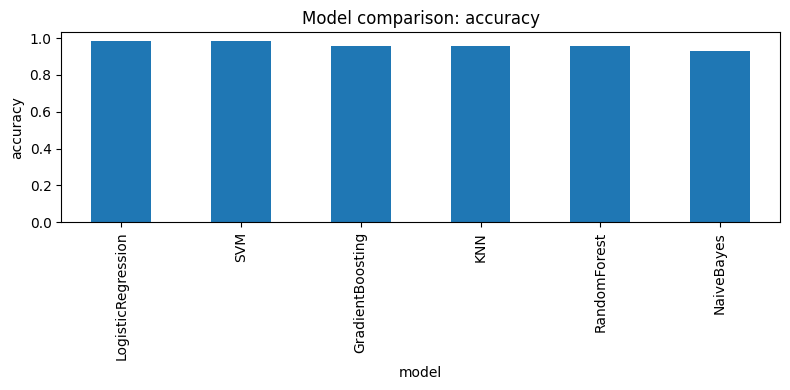

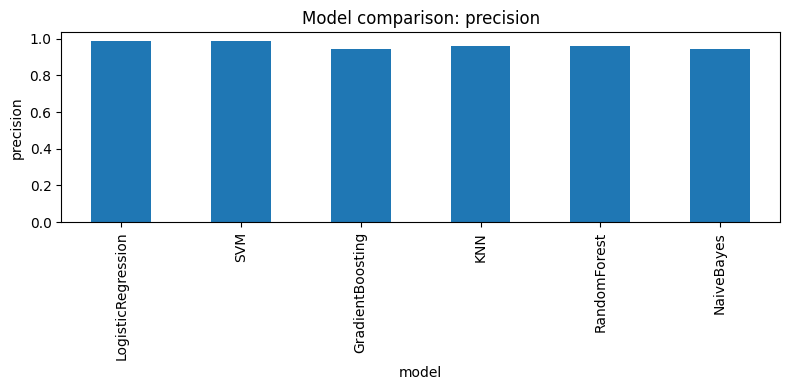

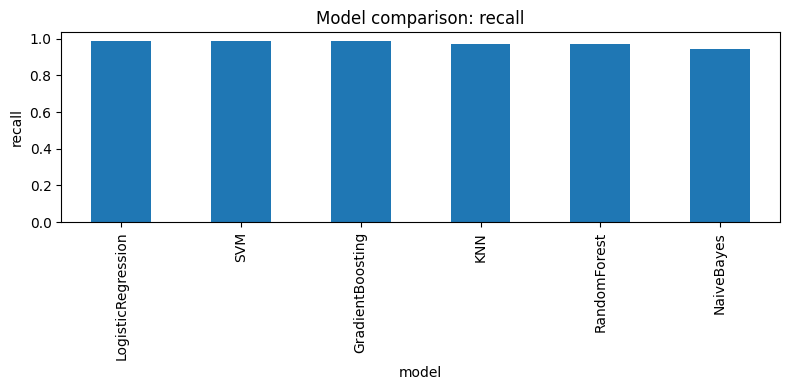

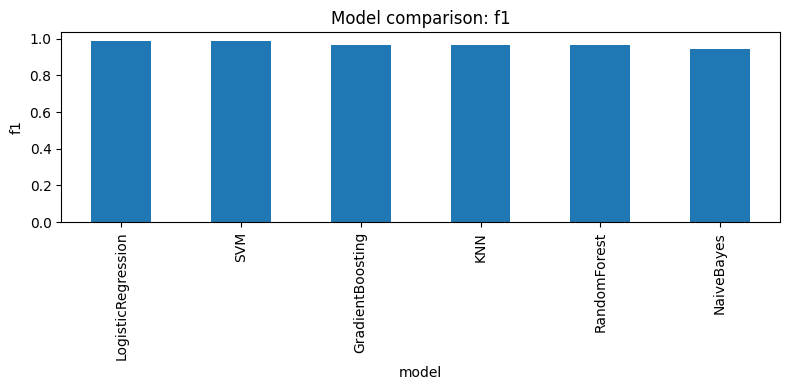

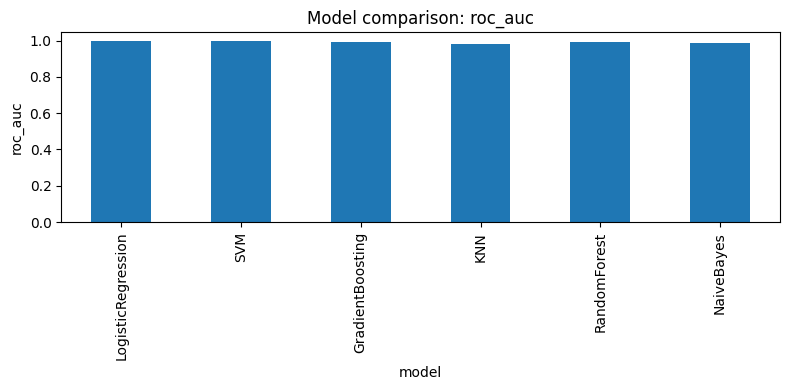

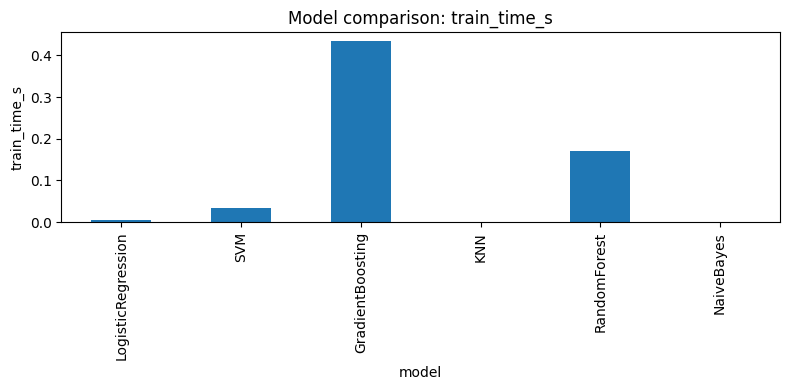

In [ ]:

metrics = ['accuracy','precision','recall','f1','roc_auc','train_time_s']
for m in metrics:
    plt.figure(figsize=(8,4))
    plt.title(f'Model comparison: {m}')
    values = results_df.set_index('model')[m]
    values.plot(kind='bar')
    plt.ylabel(m)
    plt.tight_layout()
    plt.show()


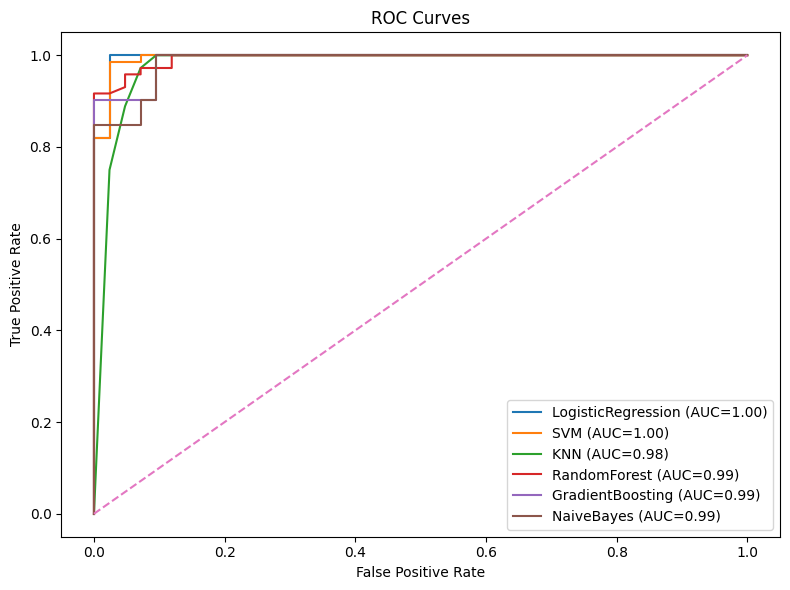

In [ ]:

plt.figure(figsize=(8,6))
for r in results:
    name = r['model']
    model = models[name]
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        try:
            y_prob = model.decision_function(X_test)
        except Exception:
            y_prob = np.array(results_df.loc[results_df['model']==name,'accuracy'])[0] * np.ones(len(y_test))
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={r['roc_auc']:.2f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.tight_layout()
plt.show()


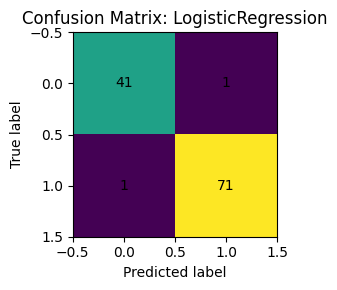

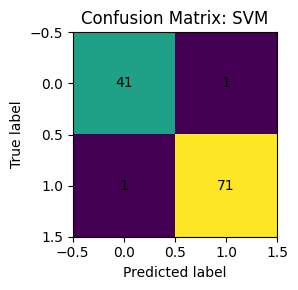

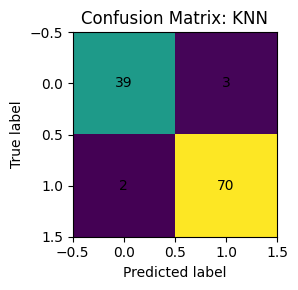

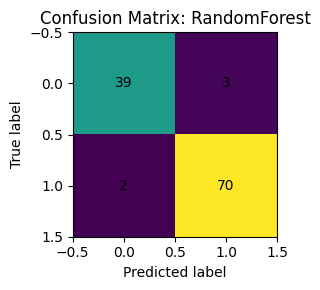

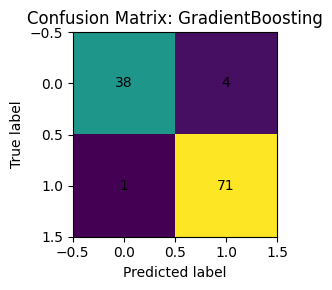

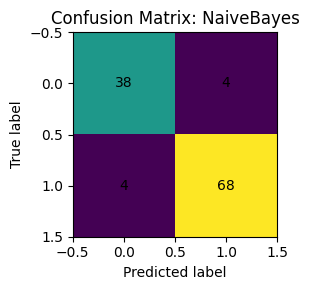

In [ ]:

for r in results:
    name = r['model']
    cm = r['confusion_matrix']
    plt.figure(figsize=(4,3))
    plt.title(f'Confusion Matrix: {name}')
    plt.imshow(cm, interpolation='nearest')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i,j]), ha='center', va='center')
    plt.tight_layout()
    plt.show()
